<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/MB07_group_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [1]:
#@markdown
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Common Imports

In [2]:
#@markdown 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

import h5py
from itertools import compress
from sklearn.preprocessing import scale
from google.colab import widgets

# Copia todos arquivos do drive para local

In [3]:
import os
path_in = '/content/drive/MyDrive/Cond 2/snirf/'
# path_in = '/content/drive/MyDrive/cond 1/snirf/'

if 'cond 1' in path_in:
  condicao = 1
else:
  condicao = 2

path_out = '/content/'

In [4]:
import pickle

# To retrieve pickle
filename = path_in + 'selected_sub_channels.pickle'
infile = open(filename,'rb')
selected_sub_channels = pickle.load(infile)
infile.close()

selected_sub_channels.keys()

dict_keys(['selected_sub', 'good_list', 'bad_list', 'channel_SD_selected'])

In [5]:
selected_sub = selected_sub_channels['selected_sub']
good_list = selected_sub_channels['good_list']
bad_list = selected_sub_channels['bad_list']
channel_SD_selected = selected_sub_channels['channel_SD_selected']

In [6]:
path_in = path_in + 'snirf0/'
path_in

'/content/drive/MyDrive/Cond 2/snirf/snirf0/'

In [7]:
df_raw_haemo_mean = pd.read_excel(path_in + 'haemo_mean' + '.xlsx')
display(df_raw_haemo_mean)
df_epochs_mean = pd.read_excel(path_in + 'epochs_mean' + '.xlsx')
display(df_epochs_mean)

,time,S1_D1 hbo,S1_D1 hbr,S1_D8 hbo,S1_D8 hbr,S1_D14 hbo,S1_D14 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S5_D14 hbo,S5_D14 hbr,S5_D15 hbo,S5_D15 hbr,S6_D10 hbo,S6_D10 hbr,S6_D12 hbo,S6_D12 hbr,S6_D13 hbo,S6_D13 hbr
0,0,4.536164e-14,-2.083550e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.658085e-14,-3.164273e-14,1.105529e-13,3.738289e-14,0.0,0.0,-1.698471e-13,3.057638e-14,-5.118499e-14,8.432516e-14
1,100,-3.137539e+02,-7.738659e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.329283e+03,-4.441251e+02,-1.272831e+03,-5.252833e+02,0.0,0.0,-1.232430e+03,-5.059191e+02,-1.216955e+03,-4.987121e+02
2,200,-6.004985e+02,-1.480640e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.543849e+03,-8.496104e+02,-2.435600e+03,-1.005157e+03,0.0,0.0,-2.359078e+03,-9.683422e+02,-2.328772e+03,-9.544121e+02
3,300,-8.372789e+02,-2.063333e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.546237e+03,-1.183650e+03,-3.394811e+03,-1.401044e+03,0.0,0.0,-3.290019e+03,-1.350302e+03,-3.246151e+03,-1.330535e+03
4,400,-1.008539e+03,-2.483319e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.270370e+03,-1.424043e+03,-4.087104e+03,-1.686799e+03,0.0,0.0,-3.964192e+03,-1.626682e+03,-3.908576e+03,-1.602284e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21696,2169600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21697,2169700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21698,2169800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21699,2169900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D8 hbo,S1_D8 hbr,S1_D14 hbo,S1_D14 hbr,S2_D2 hbo,...,S5_D14 hbo,S5_D14 hbr,S5_D15 hbo,S5_D15 hbr,S6_D10 hbo,S6_D10 hbr,S6_D12 hbo,S6_D12 hbr,S6_D13 hbo,S6_D13 hbr
0,-5000,Sync1,0,-4.940127,-16.890077,0,0,0,0,0,...,-23.303281,-7.741267,-23.170225,-9.868259,0,0,-24.814744,-12.073923,-29.818632,-4.021063
1,-4900,Sync1,0,-2.844324,-15.426689,0,0,0,0,0,...,-20.500394,-6.314867,-20.388463,-8.525104,0,0,-21.146907,-11.755421,-28.552431,-1.042988
2,-4800,Sync1,0,-1.355425,-13.840101,0,0,0,0,0,...,-17.770962,-5.125166,-17.766887,-7.239282,0,0,-17.715769,-11.243363,-27.160018,1.509442
3,-4700,Sync1,0,-0.411415,-12.101137,0,0,0,0,0,...,-15.032789,-4.266698,-15.293080,-6.021165,0,0,-14.557279,-10.525158,-25.456877,3.457221
4,-4600,Sync1,0,0.103686,-10.229380,0,0,0,0,0,...,-12.247226,-3.768485,-12.956714,-4.872947,0,0,-11.683642,-9.635345,-23.314713,4.694303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,9600,Async8,23,2.170772,-0.173158,0,0,0,0,0,...,-1.646303,-1.269699,-1.964223,0.134849,0,0,-2.728711,2.628865,2.061420,-4.587382
3620,9700,Async8,23,2.311916,0.024974,0,0,0,0,0,...,-1.302113,-1.675996,-1.950854,0.175879,0,0,-3.062027,3.341286,1.546367,-3.886052
3621,9800,Async8,23,2.552697,0.130464,0,0,0,0,0,...,-1.015224,-1.977839,-1.905328,0.166610,0,0,-3.316998,3.794501,0.678327,-2.827139
3622,9900,Async8,23,2.914938,0.130562,0,0,0,0,0,...,-0.757290,-2.200447,-1.816715,0.116631,0,0,-3.432267,3.892101,-0.419529,-1.552805


In [8]:
df_raw_haemo_mean['S1_D1 hbo'].isnull().sum()

254

In [9]:
df_raw_haemo_mean.shape

(21701, 49)

In [10]:
df_raw_haemo_mean = df_raw_haemo_mean.dropna()

In [11]:
df_epochs_mean.isnull().sum().sum()

0

In [12]:
df_raw_haemo_mean.drop(columns=['time']).max()

S1_D1 hbo     186.789125
S1_D1 hbr     446.889192
S1_D8 hbo       0.000000
S1_D8 hbr       0.000000
S1_D14 hbo      0.000000
S1_D14 hbr      0.000000
S2_D2 hbo       0.000000
S2_D2 hbr       0.000000
S2_D3 hbo       0.000000
S2_D3 hbr       0.000000
S2_D8 hbo     567.083079
S2_D8 hbr     308.436317
S2_D9 hbo       0.000000
S2_D9 hbr       0.000000
S2_D11 hbo      0.000000
S2_D11 hbr      0.000000
S3_D4 hbo       0.000000
S3_D4 hbr       0.000000
S3_D5 hbo       0.000000
S3_D5 hbr       0.000000
S3_D9 hbo       0.000000
S3_D9 hbr       0.000000
S3_D10 hbo      0.000000
S3_D10 hbr      0.000000
S3_D12 hbo      0.000000
S3_D12 hbr      0.000000
S4_D6 hbo     770.467327
S4_D6 hbr     252.930705
S4_D7 hbo       0.000000
S4_D7 hbr       0.000000
S4_D10 hbo    708.497786
S4_D10 hbr    288.939527
S4_D13 hbo    703.692396
S4_D13 hbr    287.777274
S5_D8 hbo     746.480656
S5_D8 hbr     250.482176
S5_D11 hbo    718.470299
S5_D11 hbr    296.060733
S5_D14 hbo    776.073210
S5_D14 hbr    255.751499


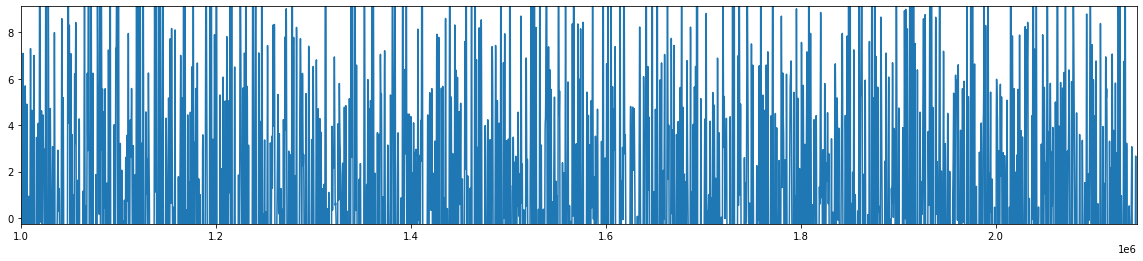

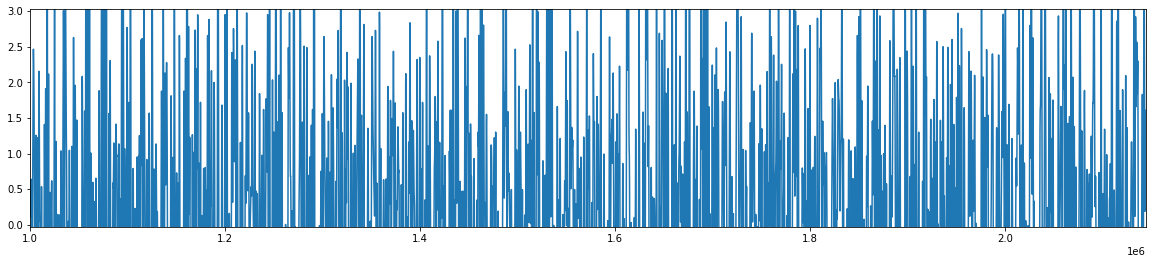

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


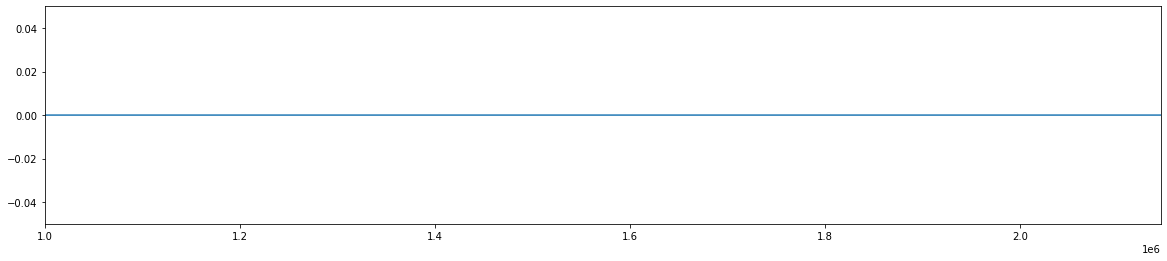

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


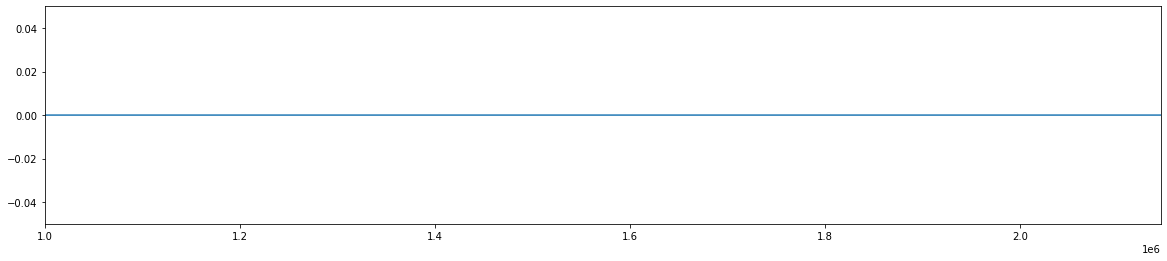

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


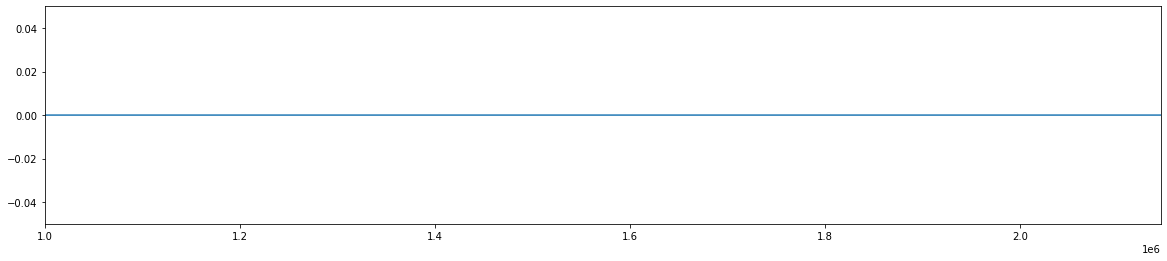

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


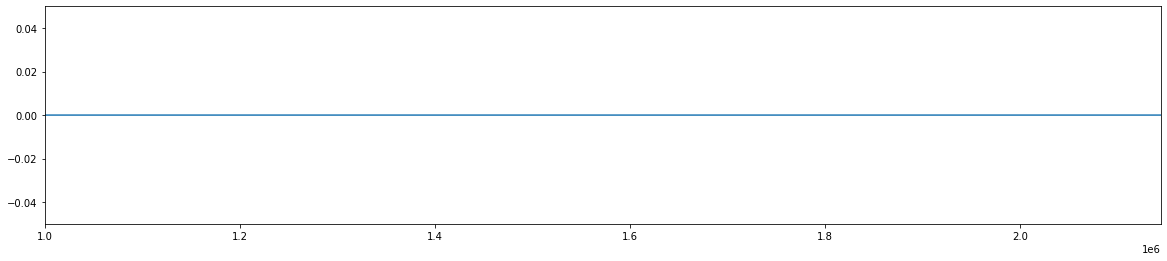

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


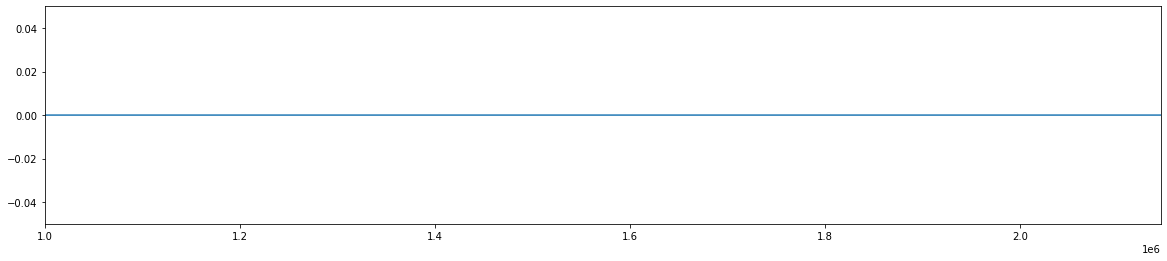

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


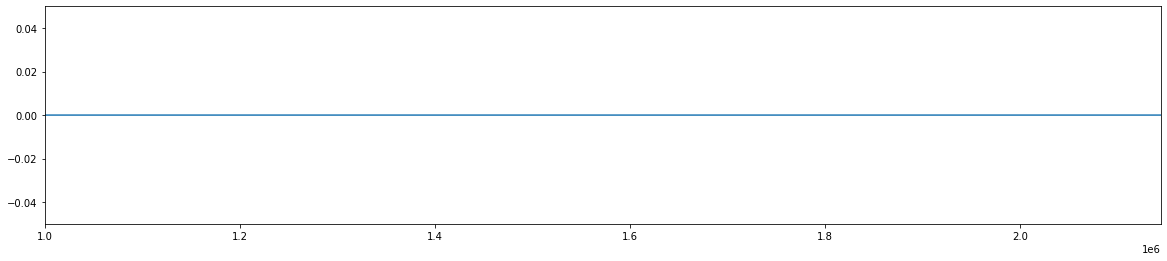

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


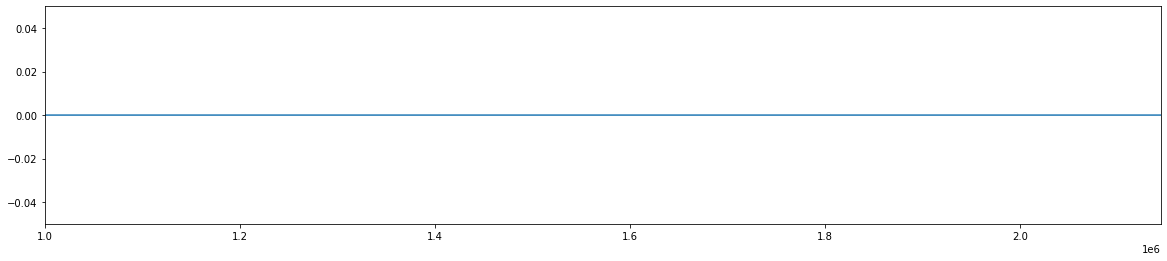

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


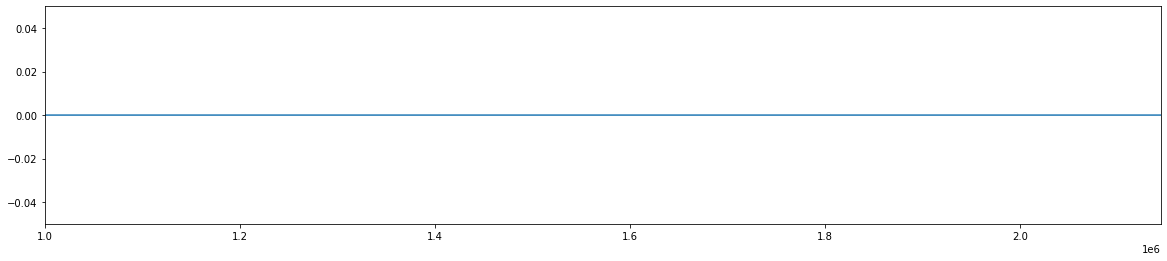

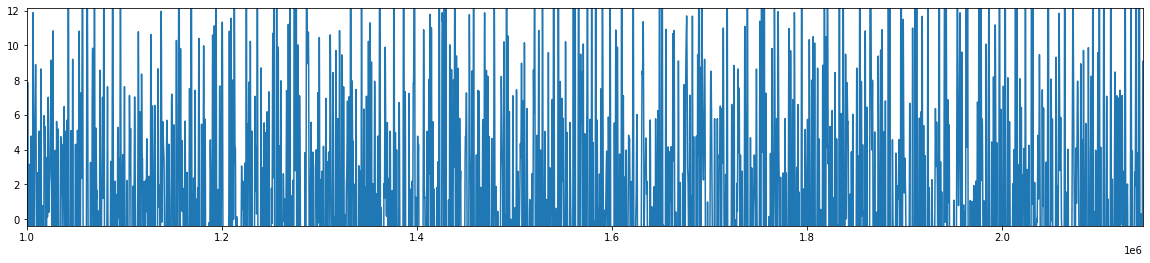

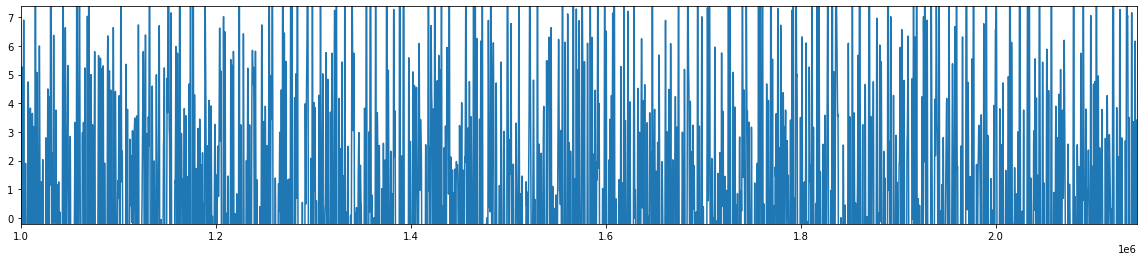

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


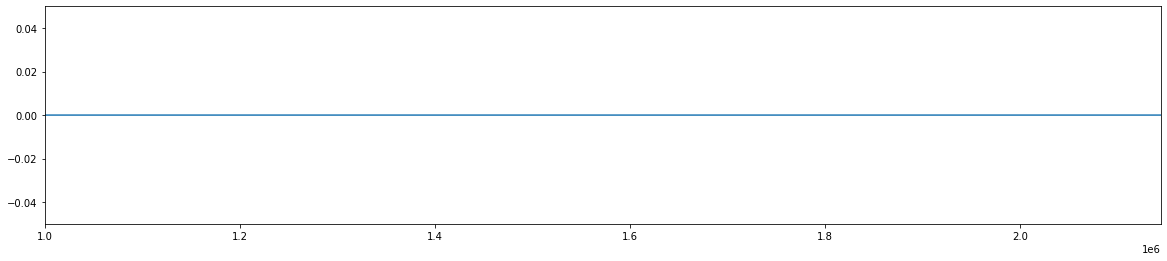

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


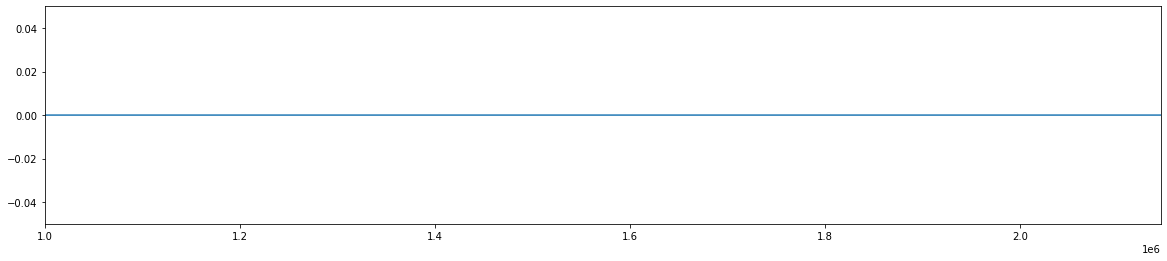

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


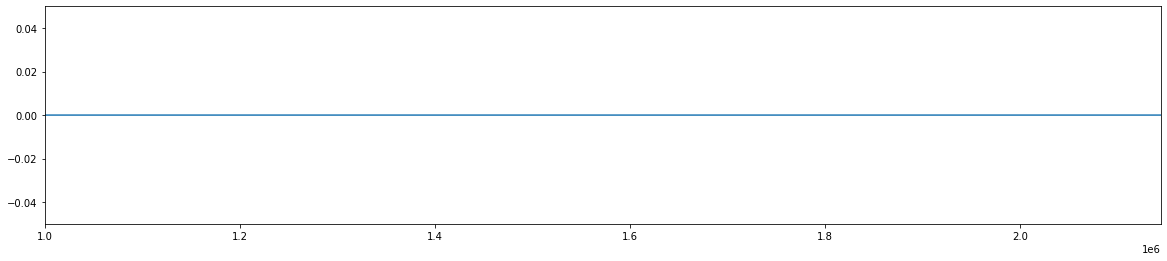

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


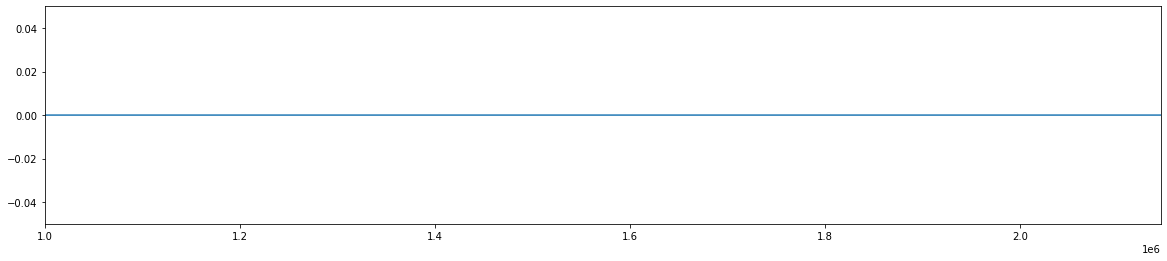

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


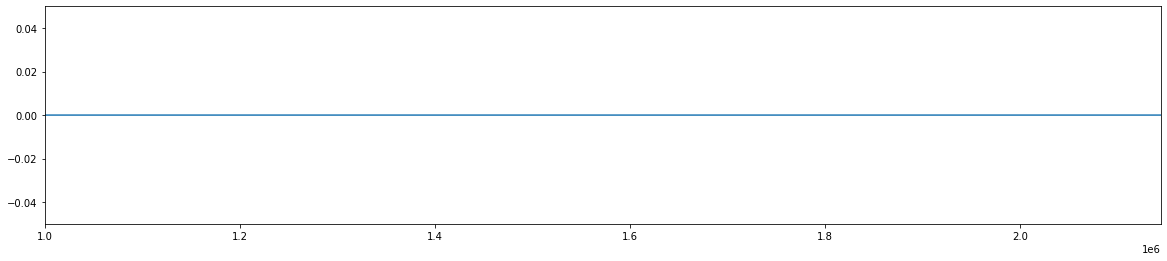

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


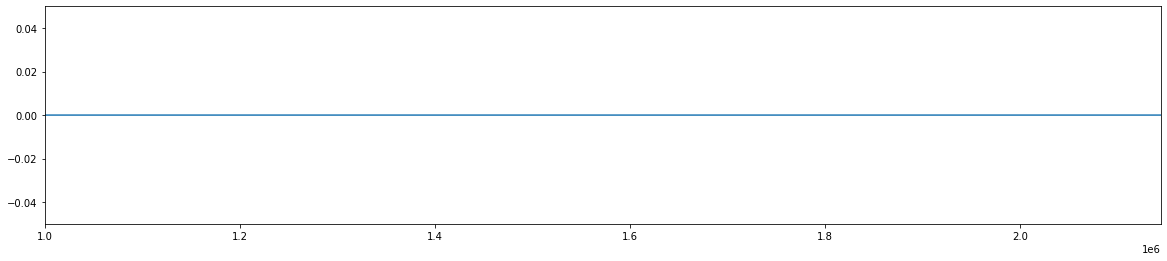

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


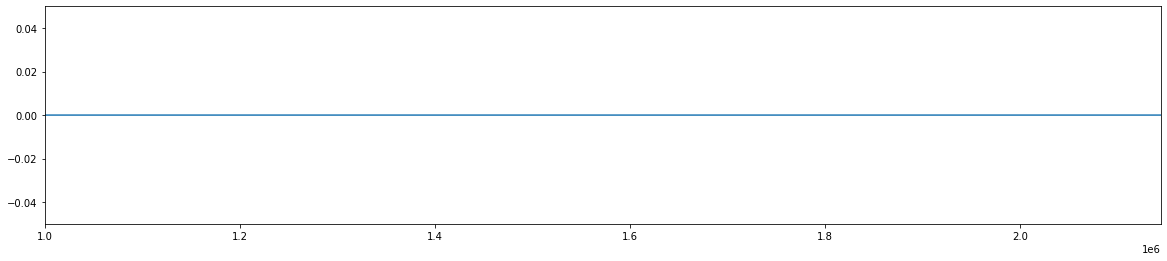

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


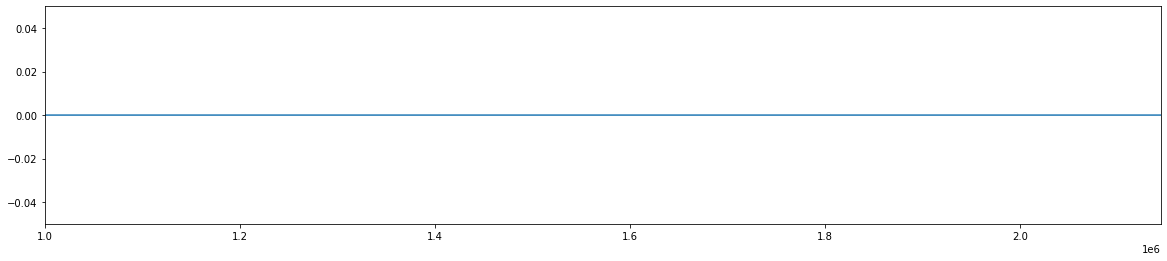

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


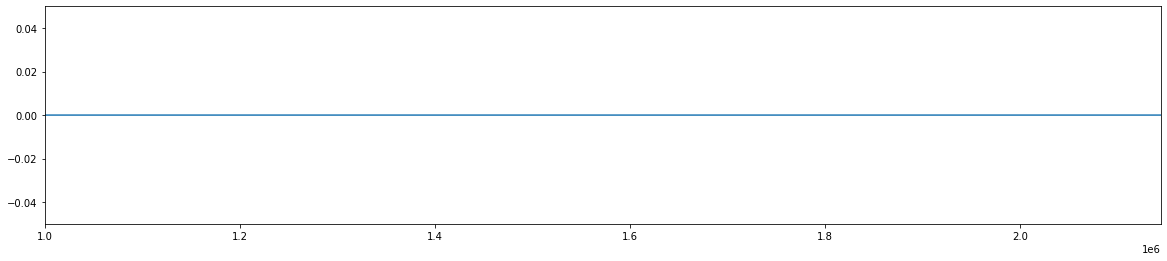

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


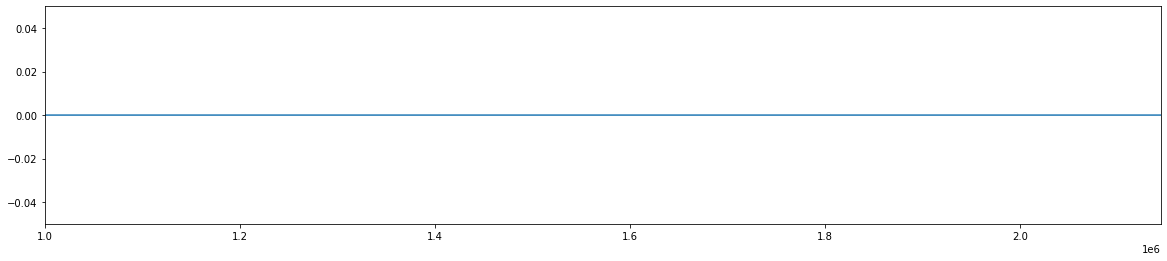

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


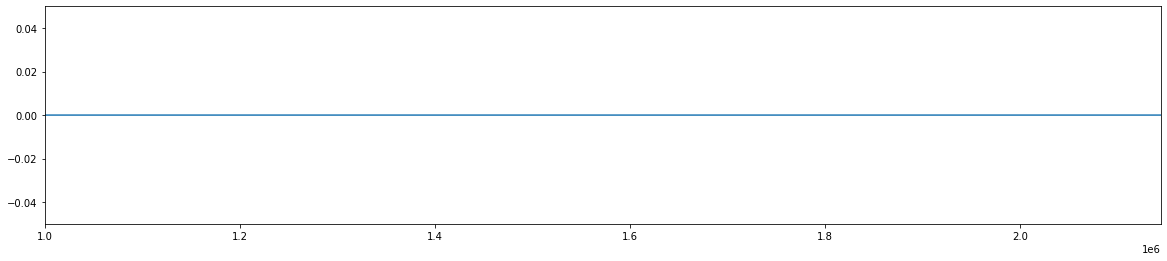

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


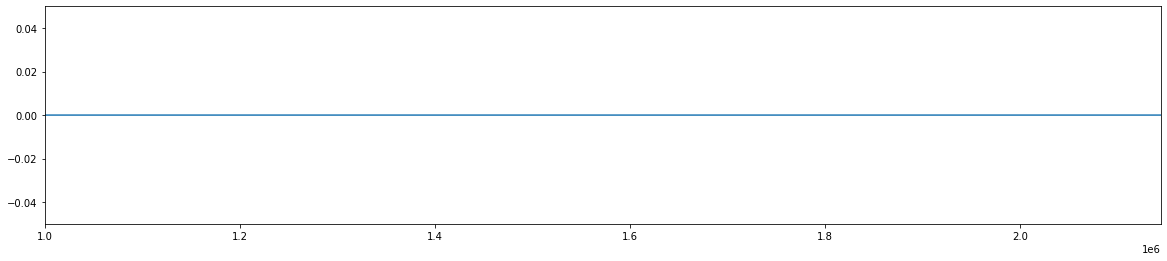

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


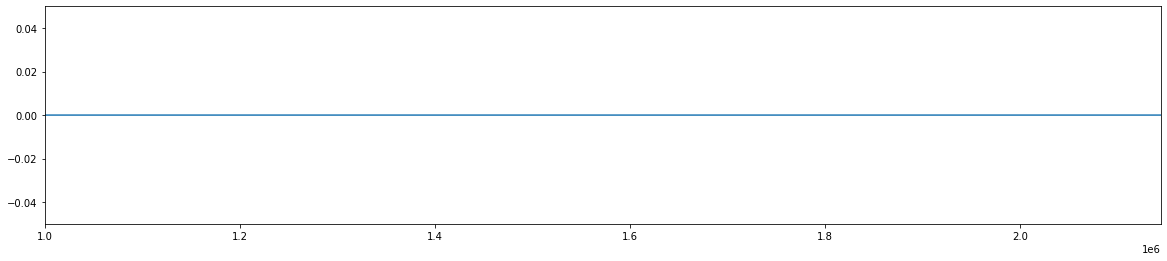

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


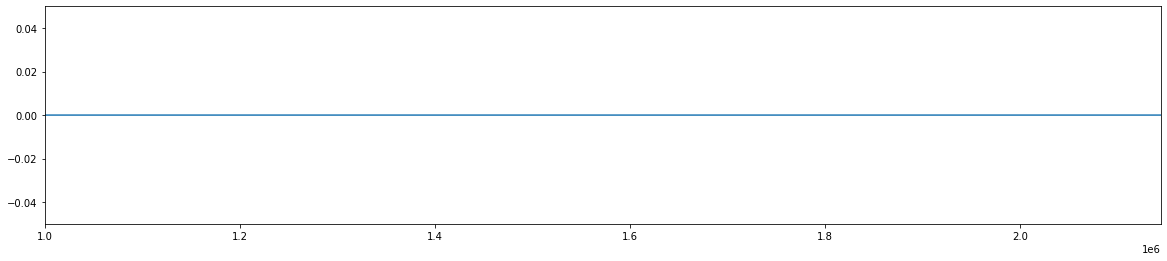

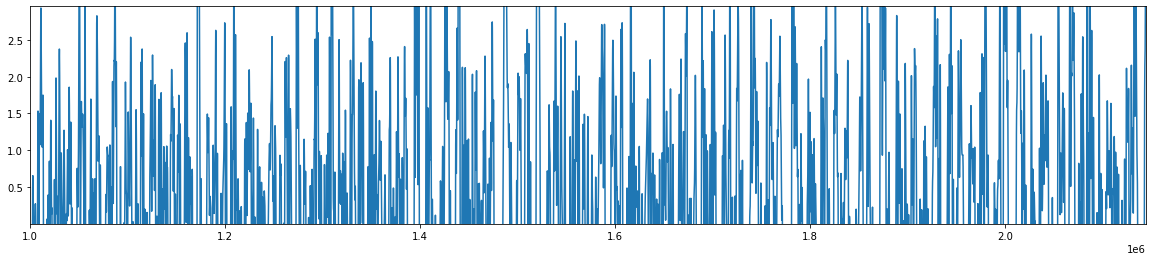

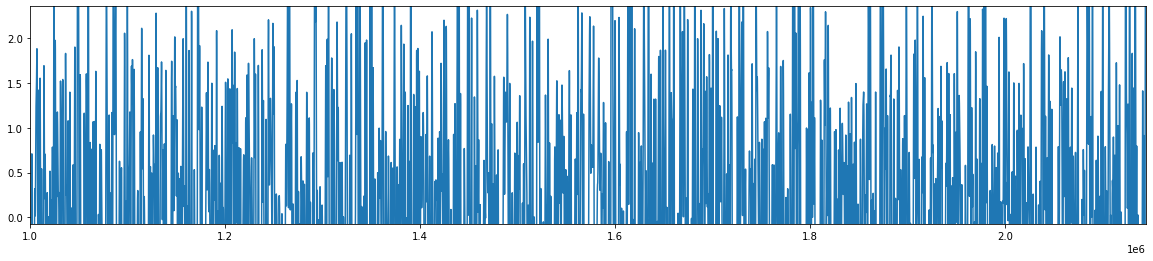

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


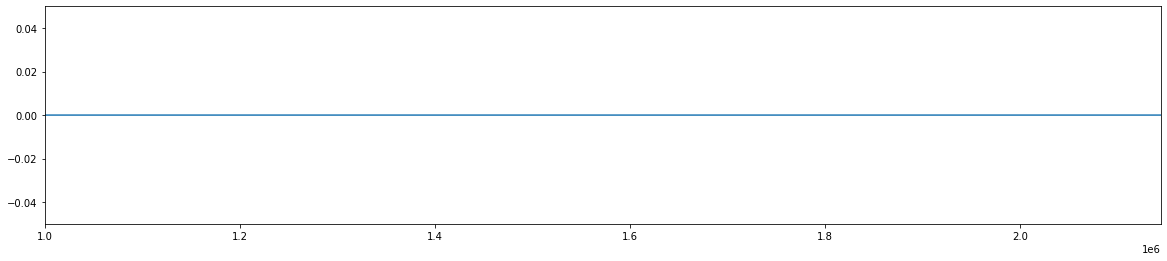

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


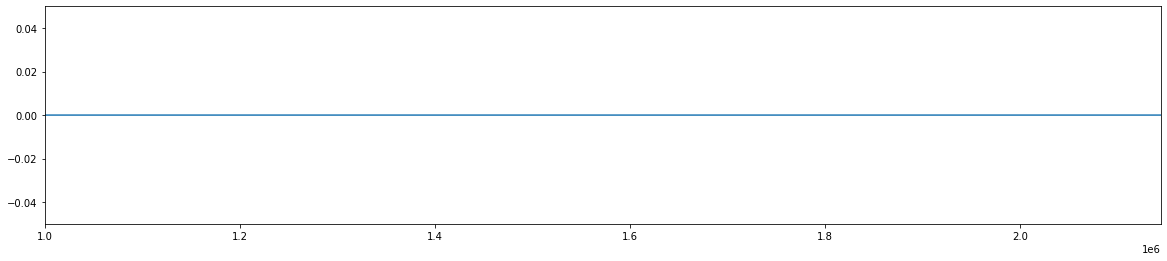

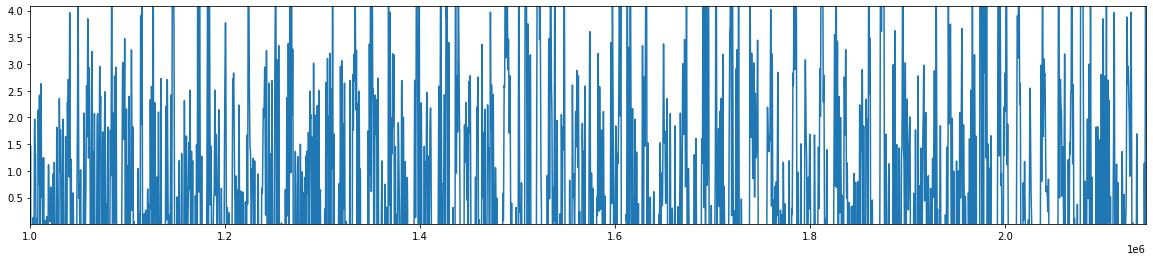

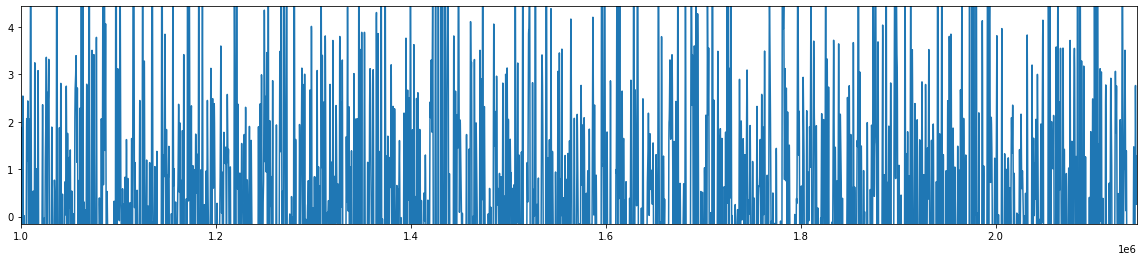

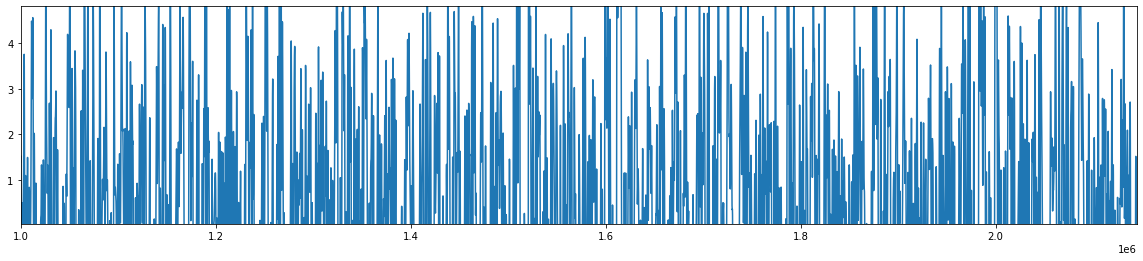

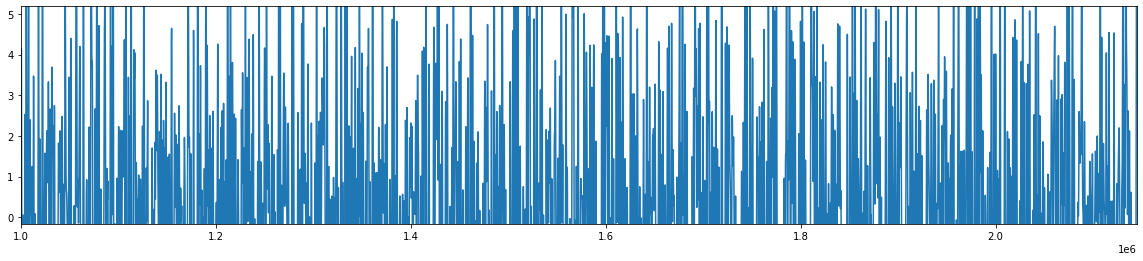

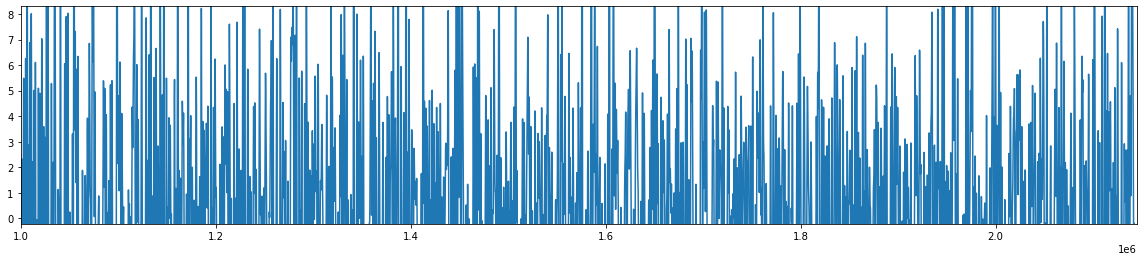

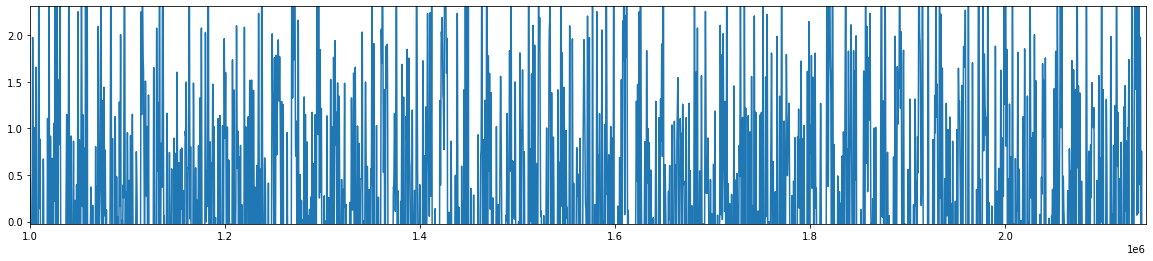

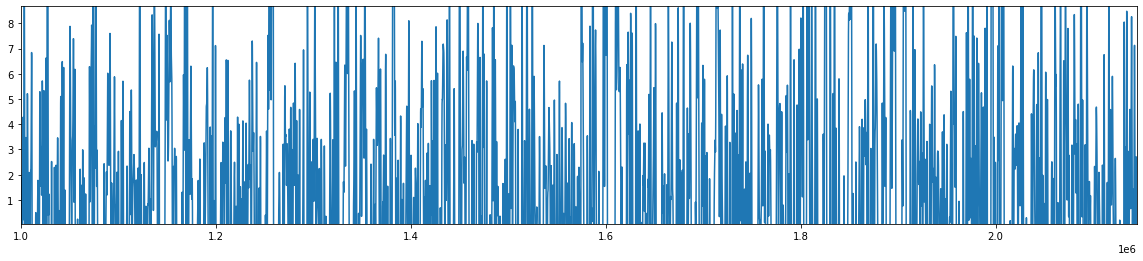

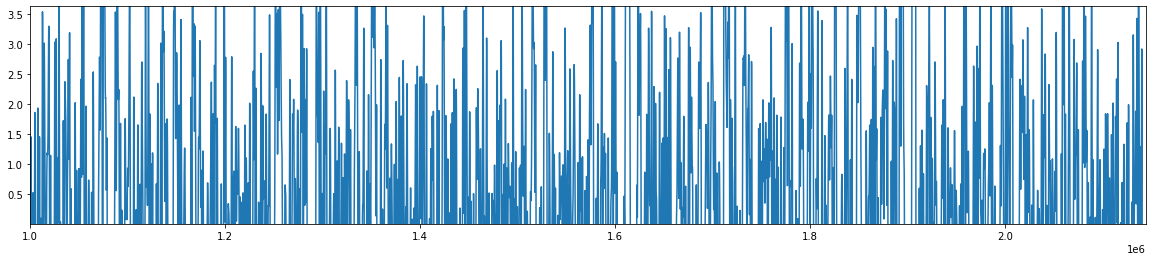

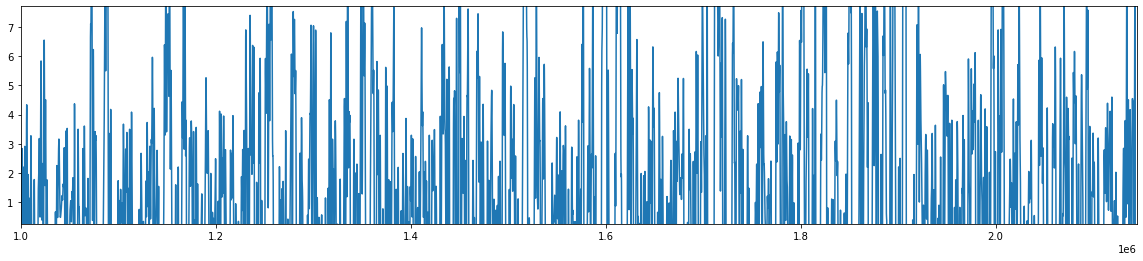

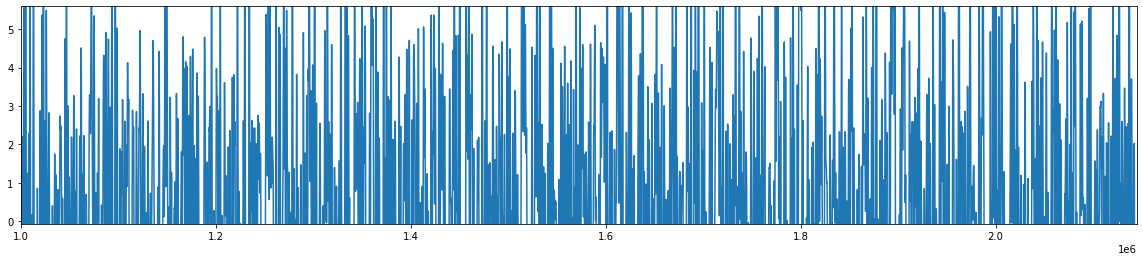

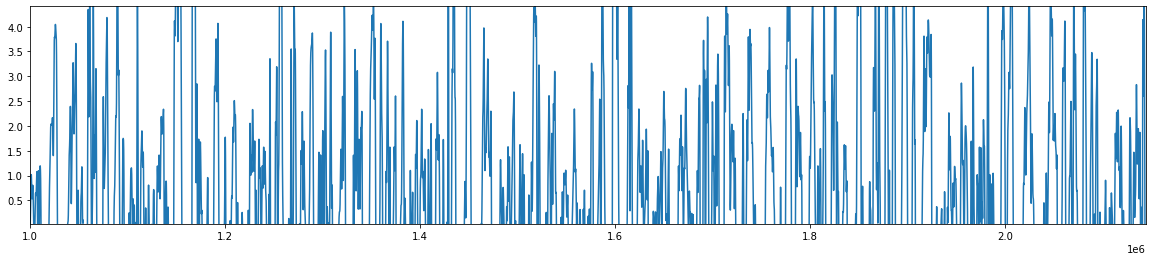

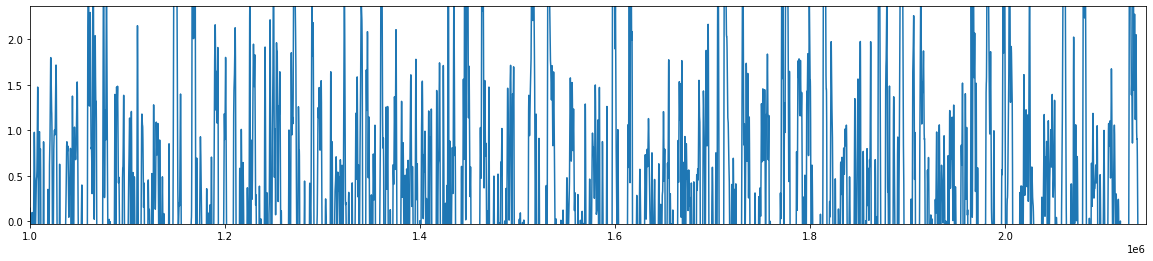

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


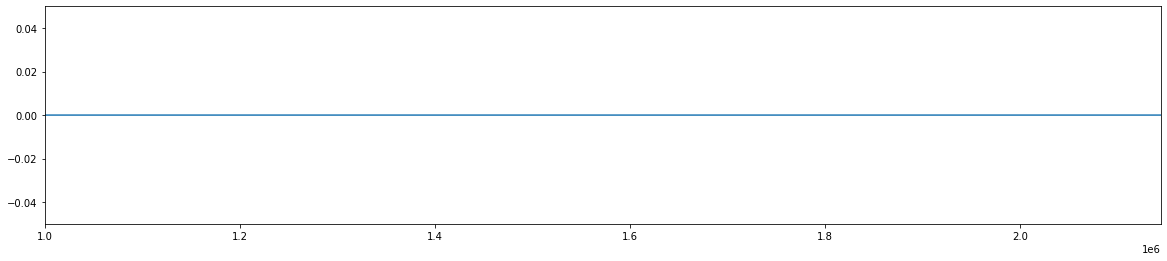

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  """


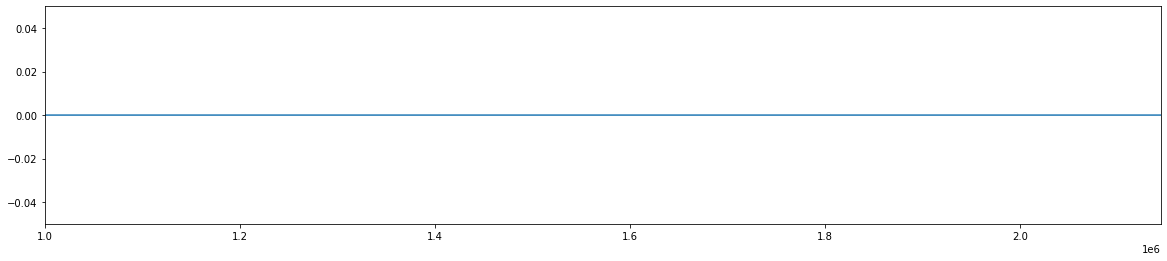

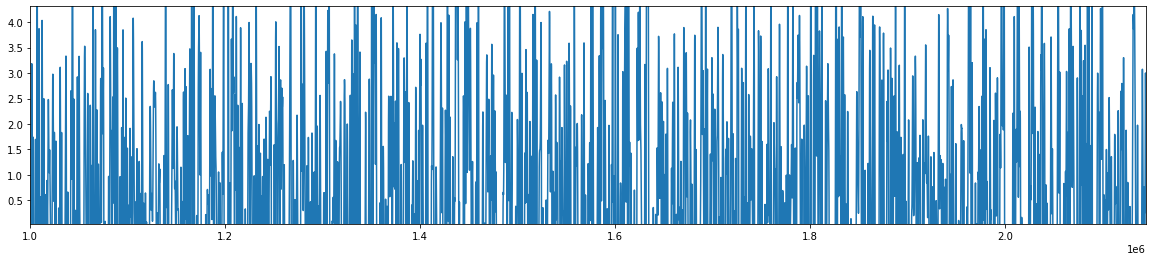

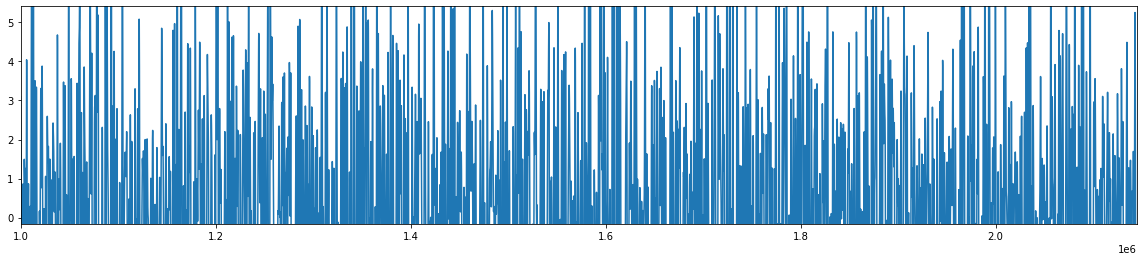

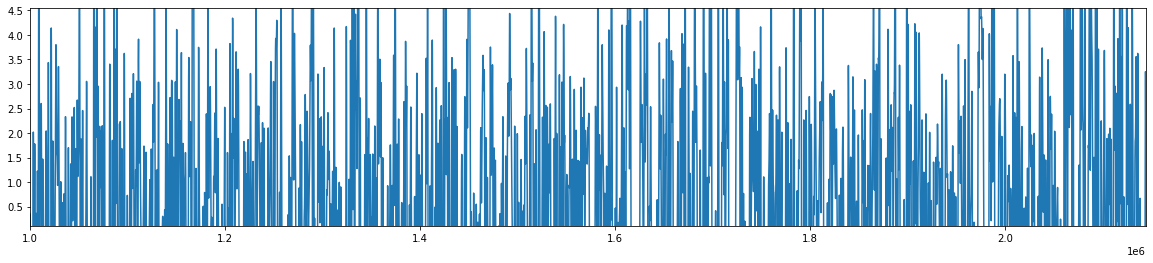

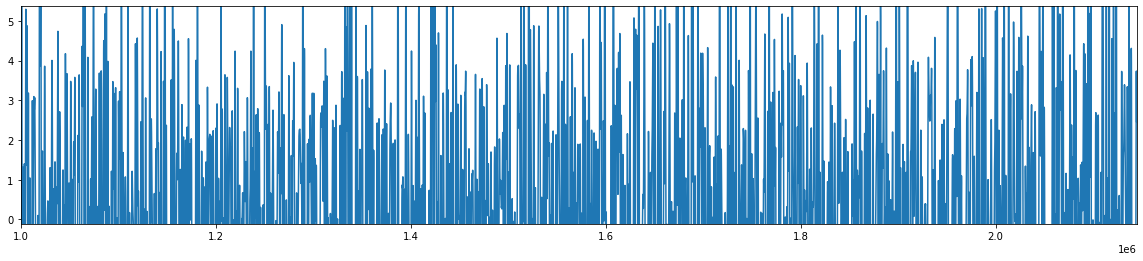

In [13]:
for c in df_raw_haemo_mean.drop(columns=['time']):
  fig = plt.figure(figsize=(20,4))
  plt.plot(df_raw_haemo_mean.time, df_raw_haemo_mean[c])
  plt.xlim([1000000, df_raw_haemo_mean.time.max()])
  plt.ylim([df_raw_haemo_mean[c].quantile(0.5), df_raw_haemo_mean[c].quantile(0.95)])
  plt.show()

In [14]:
df_epochs_mean.drop(columns=['time','condition','epoch']).mean()

S1_D1 hbo    -0.766298
S1_D1 hbr    -2.632218
S1_D8 hbo     0.000000
S1_D8 hbr     0.000000
S1_D14 hbo    0.000000
S1_D14 hbr    0.000000
S2_D2 hbo     0.000000
S2_D2 hbr     0.000000
S2_D3 hbo     0.000000
S2_D3 hbr     0.000000
S2_D8 hbo    -3.396576
S2_D8 hbr    -1.743536
S2_D9 hbo     0.000000
S2_D9 hbr     0.000000
S2_D11 hbo    0.000000
S2_D11 hbr    0.000000
S3_D4 hbo     0.000000
S3_D4 hbr     0.000000
S3_D5 hbo     0.000000
S3_D5 hbr     0.000000
S3_D9 hbo     0.000000
S3_D9 hbr     0.000000
S3_D10 hbo    0.000000
S3_D10 hbr    0.000000
S3_D12 hbo    0.000000
S3_D12 hbr    0.000000
S4_D6 hbo    -4.375579
S4_D6 hbr    -1.315534
S4_D7 hbo     0.000000
S4_D7 hbr     0.000000
S4_D10 hbo   -3.814440
S4_D10 hbr   -1.636882
S4_D13 hbo   -4.105738
S4_D13 hbr   -1.645568
S5_D8 hbo    -4.262735
S5_D8 hbr    -1.548386
S5_D11 hbo   -4.364572
S5_D11 hbr   -1.635417
S5_D14 hbo   -4.849442
S5_D14 hbr   -1.316594
S5_D15 hbo   -4.662752
S5_D15 hbr   -1.778023
S6_D10 hbo    0.000000
S6_D10 hbr 

,time,condition,epoch,total_hbo
0,-5000,Sync1,0,-10.427113
1,-4900,Sync1,0,-9.216066
2,-4800,Sync1,0,-8.087997
3,-4700,Sync1,0,-7.027461
4,-4600,Sync1,0,-6.020446
...,...,...,...,...
3619,9600,Async8,23,-0.270260
3620,9700,Async8,23,-0.398361
3621,9800,Async8,23,-0.537888
3622,9900,Async8,23,-0.657091


,total_hbo
condition,
Async1,0.038312
Async2,-0.335897
Async3,0.219692
Async4,0.018817
Async5,-0.167965
Async6,-0.429560
Async7,0.335849
Async8,-0.047901
Sync1,-43.078289


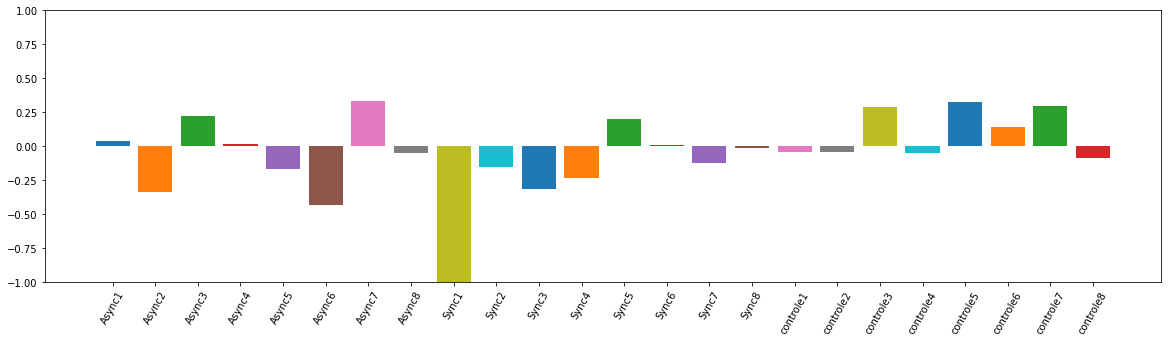

In [15]:
hbo = [ x for x in df_epochs_mean.columns if 'hbo' in x ]
event_hbo = pd.concat( [ df_epochs_mean[['time','condition','epoch']],  pd.DataFrame(df_epochs_mean[hbo].mean(axis=1))] , axis=1 )
event_hbo.rename(columns={0:'total_hbo'},inplace=True)
display(event_hbo)

event_group_hbo = pd.DataFrame(event_hbo.groupby('condition').total_hbo.mean())
display(event_group_hbo)

fig = plt.figure(figsize=(20,5)) 

i = 0
for idx, row in event_group_hbo.iterrows():
  plt.bar(i, row.total_hbo)
  i = i + 1
  plt.ylim([-1,1])

plt.xticks(np.arange(0,len(event_group_hbo)), labels=event_group_hbo.index, rotation=60)
plt.show()

In [16]:
path_in

'/content/drive/MyDrive/Cond 2/snirf/snirf0/'

In [17]:
event_group_hbo.to_excel(path_in + 'event_group_hbo' + '.xlsx')